In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv('Dataset.csv')

# Check missing values count and percentage for all columns
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Combine into one table for all columns
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent.round(2)
})

# Display all columns, sorted by missing percentage
print(missing_info.sort_values(by='Missing Percentage', ascending=False))


                  Missing Count  Missing Percentage
Bilirubin_direct        1549220               99.81
Fibrinogen              1541968               99.34
TroponinI               1537429               99.05
Bilirubin_total         1529069               98.51
Alkalinephos            1527269               98.39
AST                     1527027               98.38
Lactate                 1510764               97.33
PTT                     1506511               97.06
SaO2                    1498649               96.55
EtCO2                   1494574               96.29
Phosphate               1489909               95.99
HCO3                    1487182               95.81
Chloride                1481744               95.46
BaseExcess              1468065               94.58
PaCO2                   1465909               94.44
Calcium                 1460879               94.12
Platelets               1460001               94.06
Creatinine              1457594               93.90
Magnesium   

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer

def preprocess_data(file_path):

    df = pd.read_csv(file_path)

    # Drop columns with high missing values or irrelevant features
    # The following columns are dropped based on domain knowledge and analysis:
    #'TroponinI',          Cardiac-specific, not key for early sepsis
    #'Fibrinogen',         Rarely used in real-time sepsis screening
    #'Bilirubin_direct',   Redundant; prefer total if needed
    #'Alkalinephos',       Liver enzyme, not a core sepsis marker
    #'AST',                Liver enzyme, similar to above
    #'BaseExcess',         Derived metric, often unclear in meaning
    #'HospAdmTime',        Mostly administrative, rarely helpful
    #'Unnamed: 0',         Just a row index
    #'Patient_ID'          Identifier, not a predictive feature
    
    df.drop(columns=[
    'Unnamed: 0', 'Patient_ID', 'TroponinI', 'Fibrinogen', 'Bilirubin_direct',
    'Alkalinephos', 'AST', 'BaseExcess', 'HospAdmTime'], inplace=True)
        
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    num_cols.remove('SepsisLabel')
    
    imputer = SimpleImputer(strategy='median')
    df[num_cols] = imputer.fit_transform(df[num_cols])
    
    # Encode categorical variables
    df = df.copy()
    df.loc[:, 'Gender'] = df['Gender'].astype(int)
    df.loc[:, 'Unit1'] = df['Unit1'].fillna(0)
    df.loc[:, 'Unit2'] = df['Unit2'].fillna(0)
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    return df

# Load Dataset
file_path = "Dataset.csv"
processed_df = preprocess_data(file_path)

processed_df.to_csv("ProcessedDataset.csv", index=False)

print("Preprocessing complete. Processed file saved as ProcessedData.csv.")


Preprocessing complete. Processed file saved as ProcessedData.csv.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ProcessedDataset.csv")

# Get shape
rows, cols = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


Number of rows: 1490670
Number of columns: 35


Class Distribution (%):
SepsisLabel
0    98.132853
1     1.867147
Name: proportion, dtype: float64


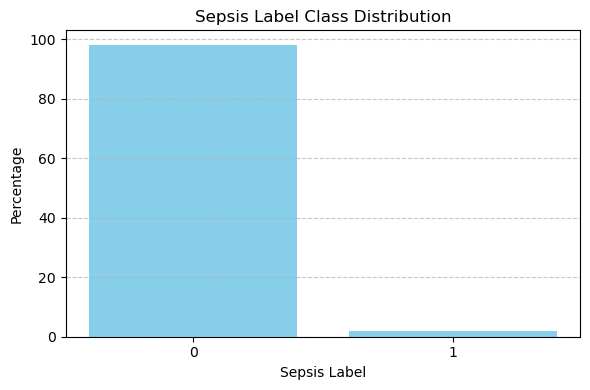

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ProcessedDataset.csv")

# Compute class distribution
class_distribution = df['SepsisLabel'].value_counts(normalize=True) * 100

# Print class distribution
print("Class Distribution (%):")
print(class_distribution)

# Plot bar graph
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index.astype(str), class_distribution.values, color='skyblue')
plt.xlabel("Sepsis Label")
plt.ylabel("Percentage")
plt.title("Sepsis Label Class Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


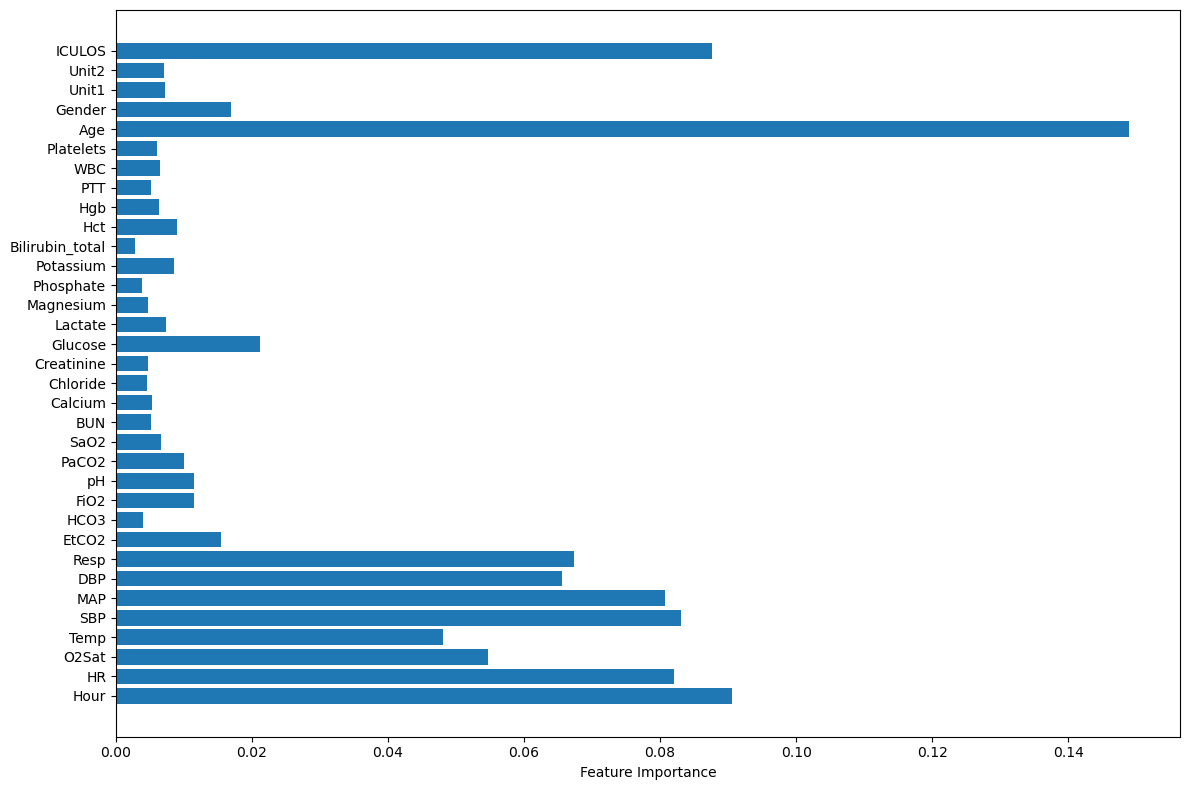

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('ProcessedDataset.csv')

# Split into features and target
X = df.drop('SepsisLabel', axis=1)
y = df['SepsisLabel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


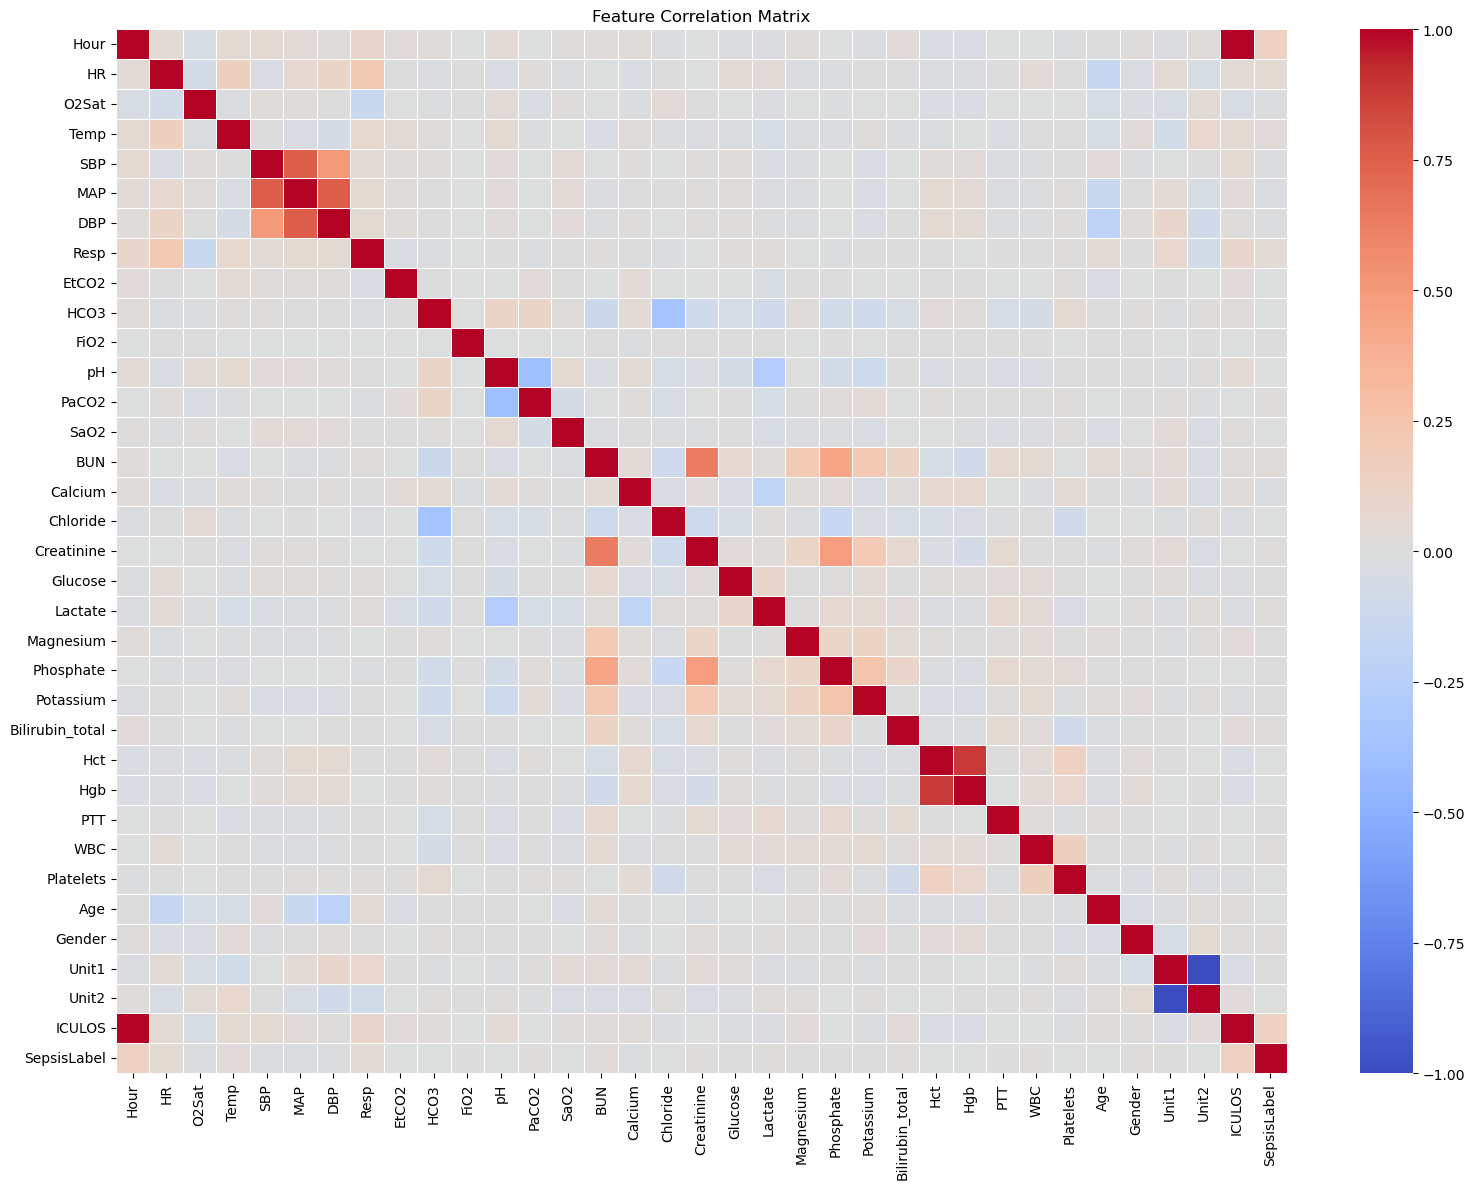

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ProcessedDataset.csv")

# Optional: drop irrelevant columns
drop_cols = [
    'Unnamed: 0', 'Patient_ID', 'TroponinI', 'Fibrinogen',
    'Bilirubin_direct', 'Alkalinephos', 'AST', 'BaseExcess', 'HospAdmTime'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [4]:
import os

# Optimize CPU Usage
os.environ["LOKY_MAX_CPU_COUNT"] = "16"

In [5]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pytorch_tabnet.tab_model import TabNetClassifier


# Load Dataset
df = pd.read_csv("ProcessedDataset.csv")

# Split into Features & Labels
X = df.drop(columns=['SepsisLabel'])
y = df['SepsisLabel']

#SMOTE Balancing
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print("\nAfter SMOTE Balancing:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)


tabnet = TabNetClassifier(
    optimizer_fn=torch.optim.AdamW,
    optimizer_params=dict(lr=0.0004901416929655027, weight_decay=0.00621506128083434),
    scheduler_params={"step_size":10, "gamma":1.0},  
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    n_d=64,
    n_a=48,
    n_steps=3,
    gamma=1.0,
    mask_type="sparsemax",
    device_name='cuda'
)

print("\nTraining Model")

# Training
tabnet.fit(
    X_train=X_train.values, y_train=y_train,
    eval_set=[(X_test.values, y_test)],
    eval_metric=["auc"],
    max_epochs=500,
    patience=20,
    batch_size=1024,
    virtual_batch_size=256,
)

print("\nModel Trained")

tabnet.save_model("tabnet_optimized")
print("\nOptimized Model Saved Successfully!")



After SMOTE Balancing:
SepsisLabel
0    62.500005
1    37.499995
Name: proportion, dtype: float64

Training Model


C:\Users\sinha\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.59027 | val_0_auc: 0.81116 |  0:01:18s
epoch 1  | loss: 0.47906 | val_0_auc: 0.84868 |  0:02:37s
epoch 2  | loss: 0.43179 | val_0_auc: 0.86518 |  0:03:54s
epoch 3  | loss: 0.40316 | val_0_auc: 0.86776 |  0:05:11s
epoch 4  | loss: 0.38667 | val_0_auc: 0.88619 |  0:06:28s
epoch 5  | loss: 0.37744 | val_0_auc: 0.88018 |  0:07:44s
epoch 6  | loss: 0.37129 | val_0_auc: 0.87177 |  0:09:02s
epoch 7  | loss: 0.36653 | val_0_auc: 0.89139 |  0:10:19s
epoch 8  | loss: 0.36219 | val_0_auc: 0.89218 |  0:11:37s
epoch 9  | loss: 0.3586  | val_0_auc: 0.8489  |  0:12:54s
epoch 10 | loss: 0.35546 | val_0_auc: 0.87074 |  0:14:08s
epoch 11 | loss: 0.35198 | val_0_auc: 0.8307  |  0:15:22s
epoch 12 | loss: 0.34893 | val_0_auc: 0.86391 |  0:16:33s
epoch 13 | loss: 0.34643 | val_0_auc: 0.90551 |  0:17:45s
epoch 14 | loss: 0.34342 | val_0_auc: 0.88947 |  0:18:57s
epoch 15 | loss: 0.34065 | val_0_auc: 0.84044 |  0:20:09s
epoch 16 | loss: 0.33706 | val_0_auc: 0.8359  |  0:21:21s
epoch 17 | los

C:\Users\sinha\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Model Trained
Successfully saved model at tabnet_optimized.zip

Optimized Model Saved Successfully!


C:\Users\sinha\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")



Classification Report:
              precision    recall  f1-score   support

           0     0.9953    0.9184    0.9553    292567
           1     0.1529    0.7742    0.2554      5567

    accuracy                         0.9157    298134
   macro avg     0.5741    0.8463    0.6054    298134
weighted avg     0.9796    0.9157    0.9423    298134


Confusion Matrix:
[[268691  23876]
 [  1257   4310]]

ROC AUC Score:
0.9297122580128603


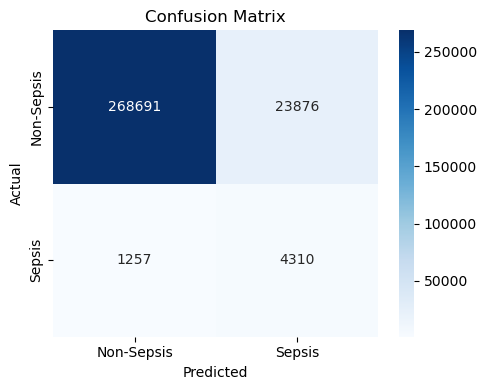

In [5]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from pytorch_tabnet.tab_model import TabNetClassifier

# Load dataset
df = pd.read_csv("ProcessedDataset.csv")

# Split into features and target
X = df.drop(columns=['SepsisLabel'])
y = df['SepsisLabel']

# Split data for evaluation (same split logic as during training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Re-initialize and load trained TabNet model
model = TabNetClassifier()
model.load_model("tabnet_optimized.zip")  # Load from saved .zip file

# Predict classes and probabilities
y_pred = model.predict(X_test.values)
y_proba = model.predict_proba(X_test.values)[:, 1]

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))



# Visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Sepsis', 'Sepsis'], yticklabels=['Non-Sepsis', 'Sepsis'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



C:\Users\sinha\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")



Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0     0.9953    0.9184    0.9553    292567
           1     0.1529    0.7742    0.2554      5567

    accuracy                         0.9157    298134
   macro avg     0.5741    0.8463    0.6054    298134
weighted avg     0.9796    0.9157    0.9423    298134


Confusion Matrix:
[[268691  23876]
 [  1257   4310]]

ROC AUC Score: 0.9297122580128603


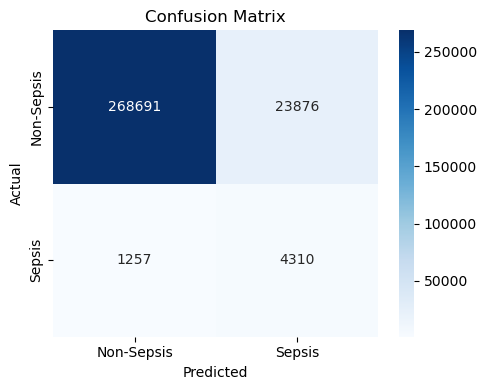

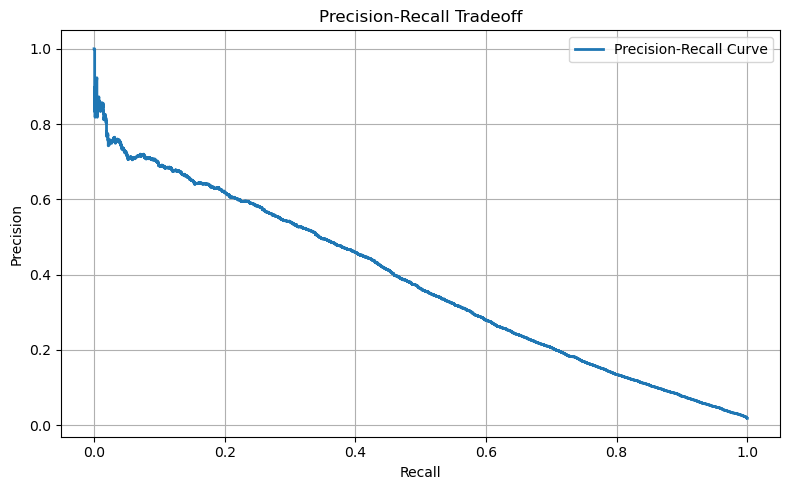

In [7]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve
)
from pytorch_tabnet.tab_model import TabNetClassifier

# Load dataset
df = pd.read_csv("ProcessedDataset.csv")

# Split features and target
X = df.drop(columns=['SepsisLabel'])
y = df['SepsisLabel']

# Train-test split (same as used in training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Load the saved TabNet model from .zip
model = TabNetClassifier()
model.load_model("tabnet_optimized.zip")

# Predict probabilities for class 1
y_proba = model.predict_proba(X_test.values)[:, 1]

# Predict default class labels using 0.5 threshold
y_pred = model.predict(X_test.values)

# Evaluation (default threshold)
print("\nClassification Report (Threshold = 0.5):")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# ROC AUC
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Sepsis', 'Sepsis'],
            yticklabels=['Non-Sepsis', 'Sepsis'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the precision-recall curve
plt.figure(figsize=(8, 5))
plt.plot(recalls, precisions, linewidth=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Tradeoff')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
